#### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

#### Importing Dataset

In [2]:
df = pd.read_csv(r"F:\Analytix Lab\My classes\Machine_Learning\My_Project\Diabetes\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Checking for missing values

In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Checking Diabetes cases Gender wise

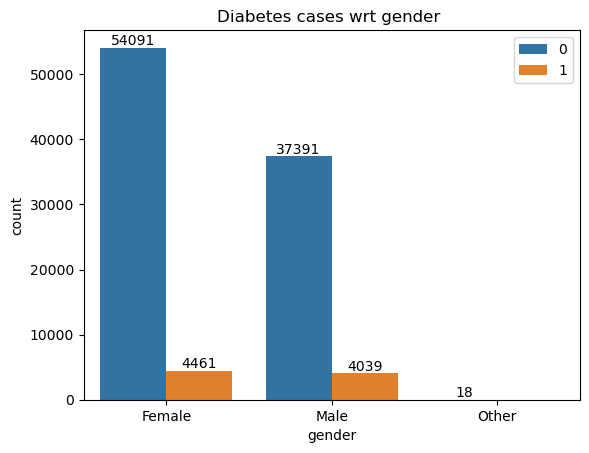

In [11]:
ax = sns.countplot(x = 'gender', data=df, hue = 'diabetes')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Diabetes cases wrt gender ")
plt.legend(loc = 'upper right')
plt.show()

#### Checking Diabetes cases Smoker_history wise

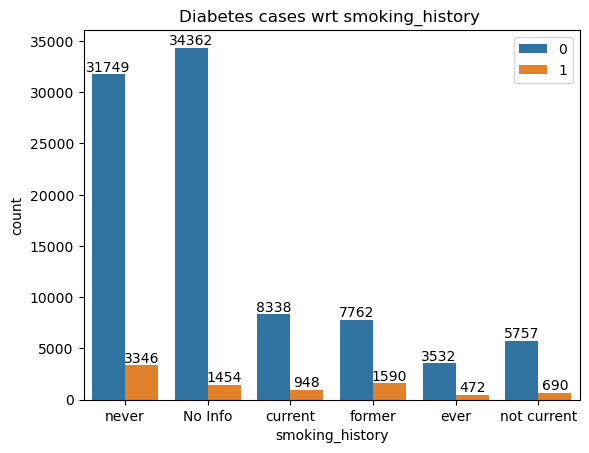

In [16]:
ax = sns.countplot(x = 'smoking_history', data=df, hue = 'diabetes')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Diabetes cases wrt smoking_history ")
plt.legend(loc = 'upper right')
plt.show()

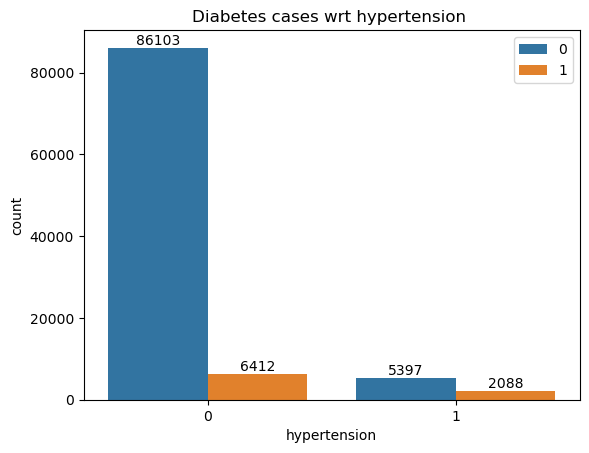

In [21]:
ax = sns.countplot(x = 'hypertension', data=df, hue = 'diabetes')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Diabetes cases wrt hypertension ")
plt.legend(loc = 'upper right')
plt.show()

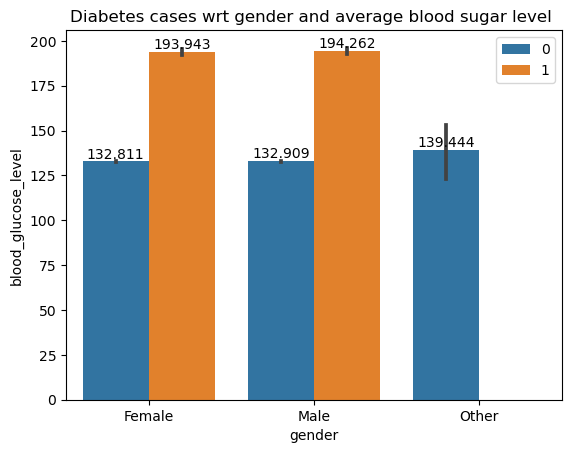

In [37]:
ax = sns.barplot(x = 'gender', y = 'blood_glucose_level', data = df, hue = 'diabetes' )
for i in ax.containers:
    ax.bar_label(i)
plt.title("Diabetes cases wrt gender and average blood sugar level ")
plt.legend(loc = 'upper right')
plt.show()   

* **From above graph we can see that diabetes people tend to have high Blood sugar level**

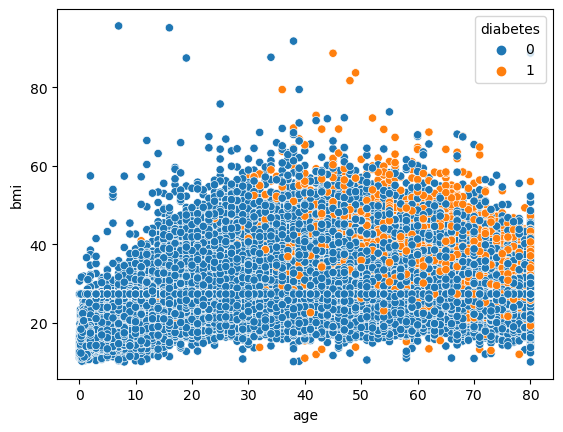

In [20]:
sns.scatterplot(x = 'age', y = 'bmi', data=df, hue =  'diabetes')
plt.show()

* **From above graph we can see that maximum people having diabetes are having age>30**

#### Checking Outliers using Box plot

In [29]:
def box_plot(x):
    sns.boxplot(x = x, data=df)
    plt.show()

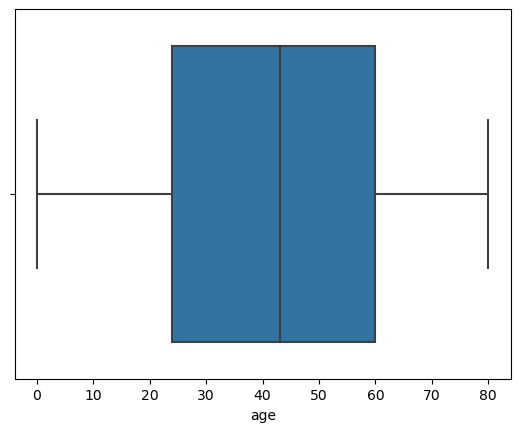

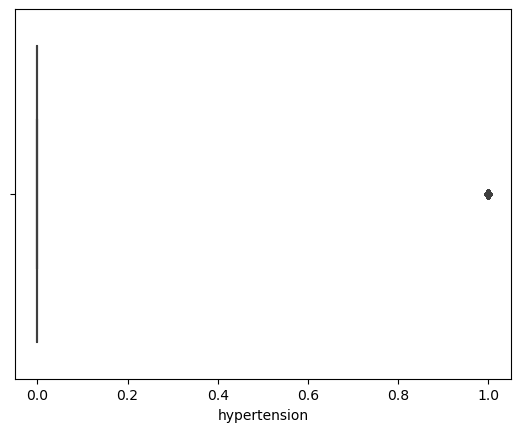

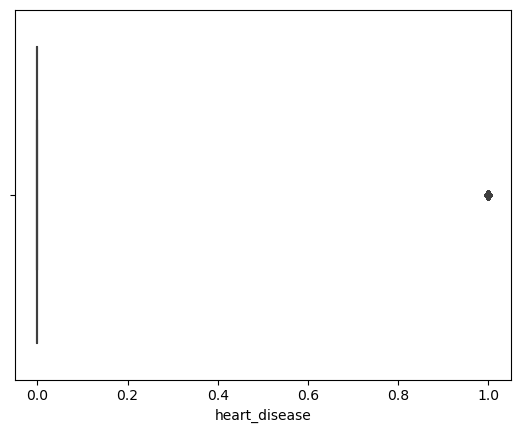

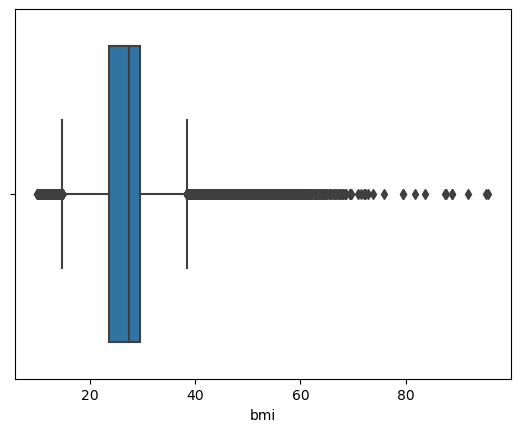

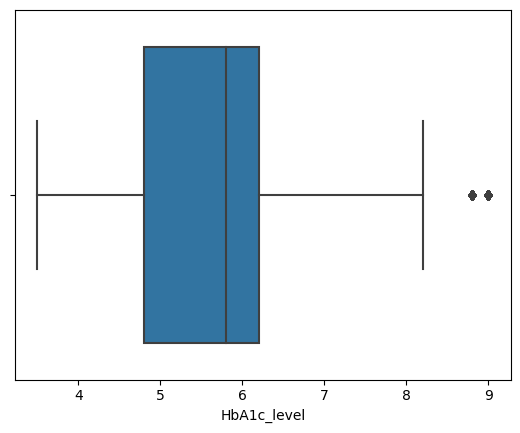

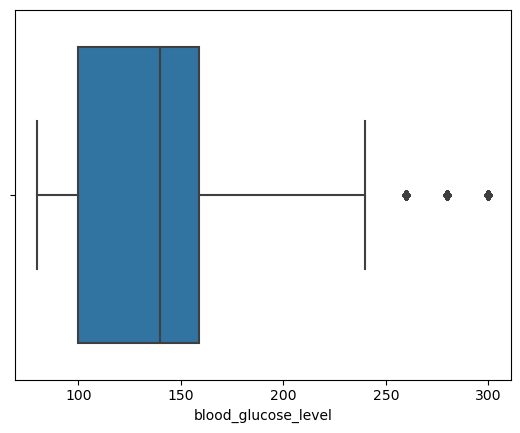

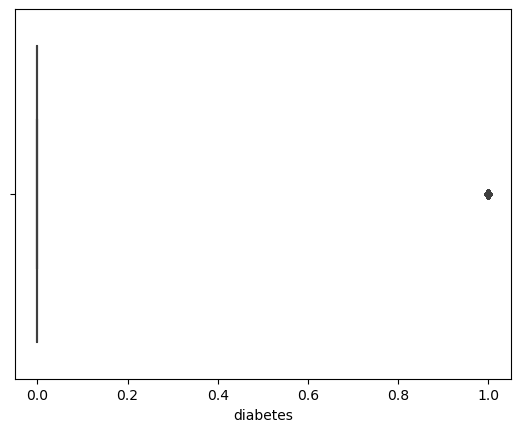

age                    None
hypertension           None
heart_disease          None
bmi                    None
HbA1c_level            None
blood_glucose_level    None
diabetes               None
dtype: object

In [32]:
df.select_dtypes('number').apply(box_plot)

In [35]:
df.select_dtypes('number').describe([0.01,0.05,0.95,0.99]).T

,count,mean,std,min,1%,5%,50%,95%,99%,max
age,100000.0,41.885856,22.516840,0.08,1.08,4.00,43.00,80.00,80.0000,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00,1.0000,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,0.00,1.0000,1.00
bmi,100000.0,27.320767,6.636783,10.01,14.60,16.82,27.32,39.49,48.7901,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,3.50,3.50,5.80,6.60,8.8000,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,80.00,80.00,140.00,200.00,280.0000,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00,1.0000,1.00


#### Treating Outlier using percentile method

In [39]:
def outlier_treat(x):
    x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    return x

In [40]:
df_num_treated = df.select_dtypes('number').apply(outlier_treat)
df_num_treated

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


#### Checking for any relation among variables using corr() function

<AxesSubplot:>

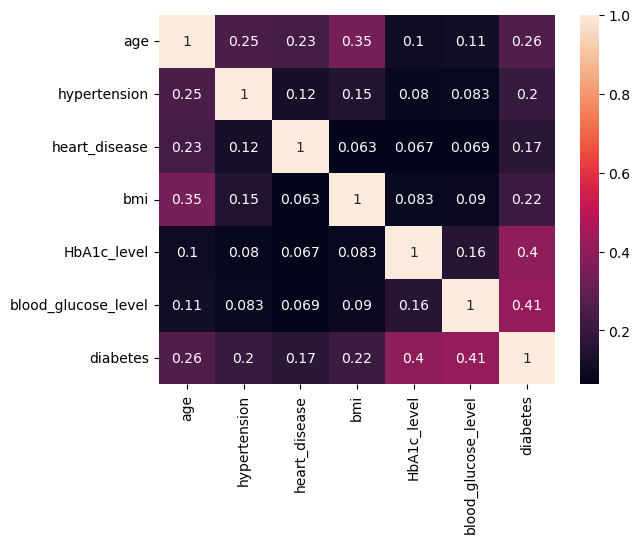

In [43]:
sns.heatmap(df_num_treated.corr(), annot=True)

#### Treating Categorical variables

In [41]:
df_cat_treated = pd.get_dummies(df.select_dtypes('object') , drop_first=True)
df_cat_treated

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,0
99997,1,0,0,0,1,0,0
99998,0,0,0,0,0,1,0


In [42]:
df_final = pd.concat([df_num_treated,df_cat_treated], axis=1)
df_final

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0,0,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,0,0,0,0,0,1,0


In [43]:
df_final.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

#### Splitting into X,y variables

In [44]:
X = df_final.drop('diabetes', axis = 1)
y = df_final['diabetes']

In [45]:
#### Splitting into train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=121)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 13)
(30000, 13)
(70000,)
(30000,)


In [46]:
y_train.value_counts()

0    64061
1     5939
Name: diabetes, dtype: int64

* **We can see that target variable is imbalance so will use Oversampling technique to overcome this issue**

In [49]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(X_train_res.shape)
print(y_train_res.shape)

print('\n' ,y_train_res.value_counts())

(128122, 13)
(128122,)

 0    64061
1    64061
Name: diabetes, dtype: int64


In [50]:
model_0 = RandomForestClassifier()
model_0.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [51]:
y_train_pred_0 = model_0.predict(X_train_res)
y_test_pred_0 = model_0.predict(X_test)

In [52]:
def model_accuracy(model):
    print("Train data accuracy is: ", accuracy_score(y_train, model.predict(X_train)))
    print("Test data accuracy is: ", accuracy_score(y_test, model.predict(X_test)))

In [53]:
model_accuracy(model_0)

Train data accuracy is:  0.9992142857142857
Test data accuracy is:  0.9563333333333334


In [55]:
print(classification_report(y_test, y_test_pred_0))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     27439
           1       0.75      0.73      0.74      2561

    accuracy                           0.96     30000
   macro avg       0.86      0.85      0.86     30000
weighted avg       0.96      0.96      0.96     30000



#### Using GridSearchCV for hyperparameters

In [56]:
param_grid = { 'n_estimators': [100,200,300],
              'max_depth' : [3,5,8,10],
              'criterion' : ["gini", "entropy"]
    }

In [57]:
model_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv = 5, verbose=1, scoring= 'accuracy')
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [58]:
model_grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}

In [59]:
model_grid.best_score_

0.9716714285714285

In [60]:
model_1 = RandomForestClassifier(n_estimators= 200, criterion='gini', max_depth=10)
model_1.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [61]:
model_accuracy(model_1)

Train data accuracy is:  0.9152
Test data accuracy is:  0.9105


In [62]:
print(classification_report(y_test, model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     27439
           1       0.49      0.83      0.61      2561

    accuracy                           0.91     30000
   macro avg       0.73      0.88      0.78     30000
weighted avg       0.94      0.91      0.92     30000

